In [32]:
import math
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [33]:
class AgentState(TypedDict):
    name: str
    numbers: List[int]
    operator: str
    result: str

In [34]:
def router(state: AgentState) -> AgentState:
    print("I m in router")
    return state

In [35]:
def addition(state: AgentState) -> AgentState:
    state["result"] = sum(state["numbers"])
    return state

In [36]:
def multiplication(state: AgentState) -> AgentState:
    state["result"] = math.prod(state["numbers"])
    return state

In [37]:
def decide(state: AgentState) -> str:
    if state["operator"] == "+":
        return "add"
    else:
        return "multiply"

In [38]:
graph = StateGraph(AgentState)
graph.add_node("router", router)
graph.add_node("addition", addition)
graph.add_node("multiplication", multiplication)

graph.set_entry_point("router")
graph.add_conditional_edges(
    "router",
    decide,
    {
        "add": "addition",
        "multiply": "multiplication"
    }
)

graph.set_finish_point("addition")
graph.set_finish_point("multiplication")

agent = graph.compile()

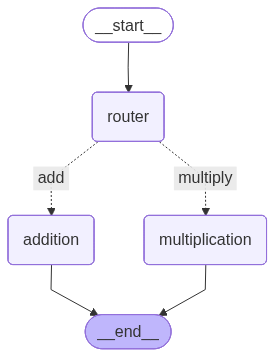

In [39]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [40]:
final_state = agent.invoke({"name": "miro", "numbers": [1,2,3,4,5], "operator": "+"})

I m in router


In [41]:
print(final_state)

{'name': 'miro', 'numbers': [1, 2, 3, 4, 5], 'operator': '+', 'result': 15}


In [42]:
final_state = agent.invoke({"name": "miro", "numbers": [1,2,3,4,5], "operator": "*"})

I m in router


In [43]:
print(final_state)

{'name': 'miro', 'numbers': [1, 2, 3, 4, 5], 'operator': '*', 'result': 120}
